In [44]:
from pandas import Series,DataFrame
import pandas as pd
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [45]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

### Question 1

** Read in the files gold.txt and labels.txt. **

**The gold DataFrame should have columns url and category, while the labels DataFrame should have columns turk, url and category. You will have to pick the right separator. **

**Approach:**
While reading the 'gold.txt' and 'labels.txt' , I am providing 'whitespace' as a delimiter and giving names for the corresponding columns of the two dataframes.

In [46]:
#delimiter = whitespace 
gold = pd.read_csv("E:\DataAnalytics_programming\hw3\gold.txt",delim_whitespace=True,names=['url','category'])
labels = pd.read_csv("E:\DataAnalytics_programming\hw3\labels.txt",delim_whitespace=True,names=['turk','url','category'])

#printing first three rows
print gold[:3]
print labels[:3]

                         url category
0  http://0800-horoscope.com        G
1         http://18games.net        X
2       http://1pixelout.net        G
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G


                        url category
                        
0  http://0800-horoscope.com        G

1         http://18games.net        X

2       http://1pixelout.net        G

             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P

1  A1PXXEOGQ76RNJ  http://000.cc        G

2  A1PXXEOGQ76RNJ  http://000.cc        G

### Question 2
**Split into two DataFrames**

**Split the labels DataFrame into two: labels on gold and labels unknown, the former containing all rows where the url is present in the gold set, and the latter one contains all remaining rows of labels.**

**Approach:**
Making a DataFrame 'labels_on_gold' where the url's from 'labels' are in 'gold' dataset. Making the dataframe 'labels_unknown' with all the 'urls' not present in 'gold' dataframe. 

In [47]:
labels_on_gold=labels[labels['url'].isin(list(gold['url'].values))]  # selecting the indices from 'labels' which have their URLs in the list of indices from 'gold'
labels_unknown=labels[~(labels['url'].isin(list(gold['url'].values)))] # selecting the indices from 'labels' which do not have their URLs in the list of indices from 'gold'

In [48]:
print labels.shape[0]
print labels_on_gold.shape[0]
print labels_unknown.shape[0]

92721
3324
89397


92721

3324

89397

### Question 3
**Compute accuracies of turks **

**Create a rater goodness DataFrame that is indexed by turk, and has two columns: the number of ratings, and the average correctness of ratings for each turk (both on gold set urls).**

**Approach:**
I created a rater_goodness dataframe with column name ='turk' and column values as the count of 'turk' from labels_on_gold. This is the total number of ratings by the turk. Indices for rater_goodness will be the same as indices in labels_on_gold. Next, I created a flag that will take on the value 1 for every match in category with 'gold' dataframe and 0 for a mismatch in category.
Using groupby, I am taking a sum of this flag for each turk, which will tell me the number of correct ratings by each turk. Avg_correctness is then calculated by dividing the correct ratings by total number of ratings for every turk. Lastly, I am renaming the columns.

In [49]:
rater_goodness=DataFrame(labels_on_gold['turk'].value_counts())
merged = pd.merge(labels_on_gold,gold, left_on= "url",right_on="url")

#creating a flag for every match in gold dataset
merged.ix[merged['category_x']== merged['category_y'],'correct']=1
merged.ix[merged['category_x']!= merged['category_y'],'correct']=0

#sum of all the flags in merged by turk.This gives the total correct ratings by a turk
correctness = merged.groupby('turk')[['correct']].sum()

#finding the ratio of correct ratings by total ratings for every turk
rater_goodness['avg_correctness'] = (correctness.T/rater_goodness['turk']).T

#renaming the column with total ratings by  a turk to number_ratings
rater_goodness=rater_goodness.rename(columns={"turk": "number_ratings"})
rater_goodness[:6]

,number_ratings,avg_correctness
A31OCN4MNHUQ6W,184,0.777174
A153PKAL7OAY36,148,0.722973
A2BTR0GQ5B5JI6,126,0.523810
ATVALOQVDCMZW,103,0.854369
AZSDW7JJL5VA7,100,0.680000
A3GE97GX3OXJTW,85,0.658824


 	number_ratings 	avg_correctness
    
A31OCN4MNHUQ6W 	184 	0.777174

A153PKAL7OAY36 	148 	0.722973

A2BTR0GQ5B5JI6 	126 	0.523810

ATVALOQVDCMZW 	103 	0.854369

AZSDW7JJL5VA7 	100 	0.680000

A3GE97GX3OXJTW 	85 	0.658824

### Question 4
**Odds ratios**

**If someone is correct p fraction of the time, the odds of success are defined as:**

**odds =p/(1-p)**

**Attach a column called odds to the rater goodness DataFrame,using the average correctness of the turk as his or her p.**

**Approach:**
To calculate the Odds , I am dividing the avg_correctness by (1.001-avg_correctness) for every row of rater_goodness. I am using 1.001 to treat the infinity values that might occur. I need to include infinity 'odds'  while comparing odds for turks.

In [50]:
rater_goodness['odds'] = rater_goodness['avg_correctness']/(1.001-rater_goodness['avg_correctness'])
rater_goodness[:6]

,number_ratings,avg_correctness,odds
A31OCN4MNHUQ6W,184,0.777174,3.472222
A153PKAL7OAY36,148,0.722973,2.600369
A2BTR0GQ5B5JI6,126,0.523810,1.097695
ATVALOQVDCMZW,103,0.854369,5.826657
AZSDW7JJL5VA7,100,0.680000,2.118380
A3GE97GX3OXJTW,85,0.658824,1.925391


                number_ratings avg_correctness odds
    
A31OCN4MNHUQ6W 184 0.777174 3.472222

A153PKAL7OAY36 148 0.722973 2.600369

A2BTR0GQ5B5JI6 126 0.523810 1.097695

ATVALOQVDCMZW 103 0.854369 5.826657

AZSDW7JJL5VA7 100 0.680000 2.118380

A3GE97GX3OXJTW 85 0.658824 1.925391

### Question 5

**Most accurate turks**

**List the top 10 most accurate turks who have rated at least 20 gold set URLs. **

**Approach:**
From the rater_goodness created above, I am creating a DataFrame where number_ratings of a turk>=20.
Sorting this list by avg_corrctness (descending order), I picked up top 10 entries, extracted their indices and printed the list of indices. Index, here, is the 'turk'. 

In [51]:
#creating a mask and extracting turks with atleast 20 ratings
atleast20_ratings = rater_goodness.ix[rater_goodness['number_ratings'] >=20]

#printing the turks with top 10 accuracy
atleast20_ratings.sort_values(by='avg_correctness',ascending=False)[:10]

,number_ratings,avg_correctness,odds
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A20PWAB7G3HDHU,20,0.800000,3.980100
A32W20KGQXS0LL,25,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635
A31OCN4MNHUQ6W,184,0.777174,3.472222


 	number_ratings 	avg_correctness 	odds
    
A2U0R4X38GUKZE 	20 	0.950000 	18.627451

A22C0PJUBFJTI0 	36 	0.916667 	10.869565

A23YQUBXZPKILZ 	24 	0.875000 	6.944444

ATVALOQVDCMZW 	103 	0.854369 	5.826657

A1HIXWH4OXT8S4 	40 	0.825000 	4.687500

A3220HG1O83HQ4 	22 	0.818182 	4.475385

A20PWAB7G3HDHU 	20 	0.800000 	3.980100

A32W20KGQXS0LL 	25 	0.800000 	3.980100

AJSJVK40F5HM6 	28 	0.785714 	3.649635

A31OCN4MNHUQ6W 	184 	0.777174 	3.472222

### Question 6

** Rating counts versus accuracy**

**One may imagine that a committed and accurate turk will rate lots of URLs.On the other hand, perhaps it is only the spammers who have the time to rate lots of URLs.**

**Is number of ratings by a turker on gold set URLs related to his or her accuracy? There's no fixed answer; just try to show some evidence for your answer. **

**Approach:**
For this problem, first, I plotted a scatter plot to observe if there are any patterns between number_ratings and avg_correctness. As can be seen in the chart below, most of the points seem to be cluttered around medium avg_correctness and low number of ratings. So, I did not identify any specific pattern.
Next, I fit a linear regression line and plotted the same. The slope of the line is close to zero resulting in a horizontal line. This, again shows there is no deterministic relation between the two variables.
Lastly, I performed a Standard and Pearson correlation, the values for which are 0.04 and -0.08, respectively. This shows that the correlation is low between two variables and close to zero.

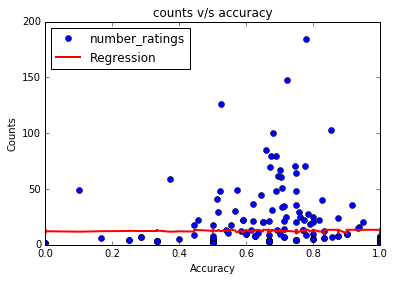

In [52]:
## plot a chart
plot(rater_goodness['avg_correctness'], rater_goodness['number_ratings'],linestyle='None',marker='o',color='blue')
xlabel('avg_correctnedd')
ylabel('number_ratings')
title('counts v/s accuracy')

## fit a linear model 
result = pd.ols(x=rater_goodness['avg_correctness'], y=rater_goodness['number_ratings'])
prediction = result.beta['intercept'] + rater_goodness['avg_correctness']*result.beta['x']
pred = Series(prediction.values, index=rater_goodness['avg_correctness'].sort_values(ascending=True))
pred.plot(label='Regression', linewidth=2,color='red')
legend(numpoints=1, loc='best')
xlabel('Accuracy')
ylabel('Counts')

In [53]:
## show pearson and standard correlation
print 'spearman correlation: ',rater_goodness['number_ratings'].corr(rater_goodness['avg_correctness'], method='spearman')
print 'standard correlation: ',rater_goodness['number_ratings'].corr(rater_goodness['avg_correctness'])

spearman correlation:  -0.0819193561196
standard correlation:  0.0452923828048


spearman correlation:  -0.0819193561196

standard correlation:  0.0452923828048

### Question 7
**Overall predicted odds**

**Consider each url u that is not in the gold set, and each category c. For the pair (u; c), calculate the product of odds of all turks who (a) rated url u as category c, and (b) have rated more gold set urls than 75% of all turks. We shall call such products of odds the overall odds henceforth.**

**Approach:**
I got a dataframe with turks having greater than 75 percentile number of ratings using the quantile() function on number_ratings from rater_goodness. Next, I created a column called 'turk' in this dataset using its own index. This was needed in order to merge this using 'turk' as the common key.
Next, I created a copy of labels_unknown and kept only the rows where turk is in the list of turks  in 'turks_75'. 
Then, I merged the two datasets on 'turk'.
Lastly , I created a pivot table that would calculate the product of odds of all turks related to a particular url and category replacing NAs by 0. I have converted the final pivot table into a DataFrame.

In [54]:
#finding 75th percentile
turks_75=rater_goodness[rater_goodness['number_ratings']>rater_goodness['number_ratings'].quantile(0.75)]
turks_75.loc[:,'turk']=turks_75.index.values

labels_unknown_75=labels_unknown.copy()
labels_unknown_75=labels_unknown_75[labels_unknown_75.loc[:,'turk'].isin(list(turks_75.index.values))]

#merge the two datasets #
merged_75 = pd.merge(labels_unknown_75, turks_75, left_on='turk',right_on='turk')

pivot_75 = DataFrame(pd.pivot_table(merged_75,index='url',columns='category',values= 'odds',aggfunc= numpy.prod,fill_value=0))
pivot_75[:6]

category,G,P,R,X
url,,,,
http://0-101.net,2.155963,0.000000,0.0,0.0
http://000.cc,1.460583,0.000000,0.0,0.0
http://0000.jp,14.488244,0.000000,0.0,0.0
http://000relationships.com,5.681060,1.851852,0.0,0.0
http://000vitamins.com,3.784982,0.000000,0.0,0.0
http://000webhost.com,11.159502,0.000000,0.0,0.0


        category 	G 	P 	R 	X
url

http://0-101.net 	2.155963 	0.000000 	0.0 	0.0

http://000.cc 	1.460583 	0.000000 	0.0 	0.0

http://0000.jp 	14.488244 	0.000000 	0.0 	0.0

http://000relationships.com 	5.681060 	1.851852 	0.0 	0.0

http://000vitamins.com 	3.784982 	0.000000 	0.0 	0.0

http://000webhost.com 	11.159502 	0.000000 	0.0 	0.0

### Question 8 
**Predicted categories**

**Create a DataFrame (called result 75, whose index is URLs not in the gold set, and with two columns called top category and top odds. The top category should be the category with the highest overall odds for that url, and the top odds should be the overall odds for that top category. These are our predictions, and the confidence we have in them (higher overall odds implies greater confidence). If you want, you can check to see if the predicted categories make sense **

**Approach:**
I used as 'data' : a series with names of columns which have the maximum overall odds and a series top_odds with maximum overall odds values.
Using the two series, I constructed a Dataframe with index as the 'URL's

In [55]:
#Making a dataframe#
result_75 = DataFrame(data={'top_category':list(pivot_75.idxmax(axis=1).values),'top_odds':list(pivot_75.max(axis=1).values)}, index = list(pivot_75.max(axis=1).index.values)) 
result_75[:6]

,top_category,top_odds
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,5.681060
http://000vitamins.com,G,3.784982
http://000webhost.com,G,11.159502


 	top_category 	top_odds
    
http://0-101.net 	G 	2.155963

http://000.cc 	G 	1.460583

http://0000.jp 	G 	14.488244

http://000relationships.com 	G 	5.681060

http://000vitamins.com 	G 	3.784982

http://000webhost.com 	G 	11.159502

### Question 9 

**Predicted categories using more turks **

**Questions 7 and 8 above only considered the ratings of turks who had rated enough gold set URLs, so we were relatively more confident about their accuracies. What happens if we loosen this restriction?**

**Repeat the code of Q7 and Q8, but replacing 75% by 25% in the description of Q7 (i.e., we also consider turks who have far fewer gold set ratings).Call this result 25. Now let's see how these two results compare. Create a DataFrame where both the index and the columns are the various categories, and the cells contain the number of urls with these as the top categories according to result 75 and result 25. For example, the cell corresponding to the row category=R and the column category=G would be the number of URLs that were predicted to be R by result 75 but predicted to be G by result 25.
Where are the most errors?**

**Hint: You might want to use the pd.crosstab function.**

**Approach:**
Repeating the steps from Question 7 and 8 with 25th percentile cut-off. For the Datasets result_25 and result_75 , I created a column 'url' from the index. Then, I merged both the datasets on 'url'. Lastly, a crosstab on top_category_x and top_category_y will give the corresponding number of urls with these as the top categories according to result 75 and result 25. Most errors are being observed for 'G' category in result_75 which corresponds to 'P' category in result_25.

In [56]:
## Steps repeated from question 7 ##

# finding 25th percentile #
turks_25=rater_goodness[rater_goodness.loc[:,'number_ratings']>(rater_goodness.loc[:,'number_ratings'].quantile(0.25))]
turks_25.loc[:,'turk']=turks_25.index.values

labels_unknown_25=labels_unknown.copy()
labels_unknown_25=labels_unknown_25[labels_unknown_25.loc[:,'turk'].isin(list(turks_25.index.values))]

merged_25 = pd.merge(labels_unknown_25, turks_25, left_on='turk',right_on='turk')
pivot_25 = DataFrame(pd.pivot_table(merged_25,index='url',columns='category',values= 'odds',aggfunc= numpy.prod,fill_value=0))

## Steps repeated from Question 8 ##
top_category = pivot_25.idxmax(axis=1)
top_odds = pivot_25.max(axis=1)
result_25 = DataFrame(data={'top_category':list(top_category.values),'top_odds':list(top_odds.values)}, index = list(top_odds.index.values))

result_25_copy=result_25.copy()
result_25_copy.loc[:,'url']=result_25.index

result_75_copy=result_75.copy()
result_75_copy.loc[:,'url']=result_75.index

#merging the two datasets
merged_top_cat = pd.merge(result_75_copy,result_25_copy,left_on='url',right_on='url')

#making a dataframe with cross tab results
DataFrame(pd.crosstab(merged_top_cat.loc[:,'top_category_x'],merged_top_cat.loc[:,'top_category_y']))

## the most errors are : 'P' is being predicted by result_25 and 'G' by result_75

top_category_y,G,P,R,X
top_category_x,,,,
G,8327,574,186,216
P,189,328,47,19
R,21,34,128,25
X,27,6,26,457


top_category_y 	G 	P 	R 	X

top_category_x 				

G 	8327 	574 	186 	216

P 	189 	328 	47 	19

R 	21 	34 	128 	25

X 	27 	6 	26 	457